# IRIS_SVM_Python

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm, datasets # To Get iris dataset & To fit the svm classifier
from sklearn.metrics import accuracy_score

## Loading Iris dataset 

In [64]:
iris = load_iris()
X = iris['data'][:, (2, 3)]  # get petal length and petal width
y = (iris['target'] == 0).astype(np.float64)  # where class is Iris-Virginica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)

(112, 2)


<img src="https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png" width="70%">

In [65]:
# print(X)
# by printing we can see all the species

#### Mean and Standard Deviation of iris dataset

In [66]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [3.79642857 1.22321429] 
standard deviation : [1.79264014 0.77793019] 


#### Standardization

In [67]:
from sklearn.preprocessing import StandardScaler
X_std = scaler = StandardScaler()

#### `fit()`

In [68]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### `transform()`

In [69]:
X_train_scaled = scaler.transform(X_train)

Now we can rescale our data by applying the transform (not predict) method:

In [70]:
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ 7.13714802e-17 -3.66770106e-16] 
standard deviation : [1. 1.] 


It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling

In [71]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))

mean test data: [-0.08461917 -0.12117658]


### Spliting Training and Building model

In [72]:
# Splitting the dataset into the Training set and Test set
clf = SVC(kernel='linear', random_state=1)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred)

1.0

<img src="http://www.snrazavi.ir/imgs/iris.png" width="70%">

In [75]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
df['target']= iris.target
df.head()
iris.target_names
df[df.target==2].head()
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [76]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

#### Visualizing the relationship between sepal and target classes

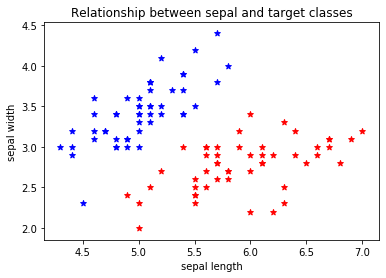

In [77]:
# draw main axises
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker = '*')

plt.title('Relationship between sepal and target classes')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

#### Visualizing the relationship between Petal and target classes

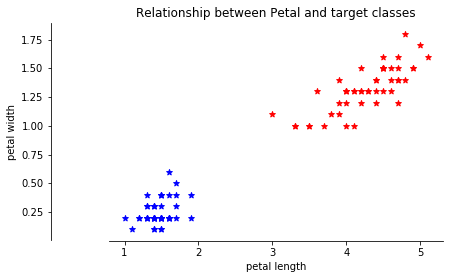

In [78]:
fig, ax = plt.subplots()
plt.title('Relationship between Petal and target classes')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker = '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker = '*')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.show()

### LinearSVC Result

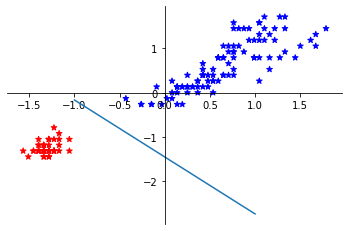

In [79]:
from sklearn.svm import LinearSVC, SVC

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
fig, ax = plt.subplots()
svc = LinearSVC()
svc.fit(X_std, y)
plt.scatter(X_std[:,0], X_std[:,1], c=['blue' if c == 0 else 'red' for c in y], marker = '*')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.plot(xx, yy)
plt.axis("on")
plt.show();

In [80]:
feature_names = iris.feature_names[:2]
classes = iris.target_names

#### by use of numpy, we create 2d array 

In [81]:
def Meshgrid_Crt(x, y, h=.02):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1 
    y_max = y.max() + 1
    # meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    return xx, yy



def Contours_Plot(ax, clf, xx, yy, **kwargs):
    # kwargs are used to specify properties like a line label (for auto legends), linewidth,...
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #The ravel() function is used to create a contiguous flattened array
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z, **kwargs) #draw filled contours, while contourf draws contour lines
    return out

In [83]:
# The classification SVC model
model = svm.SVC(kernel="linear")
clf = model.fit(X_train, y_train)

### Classify Iris dataset

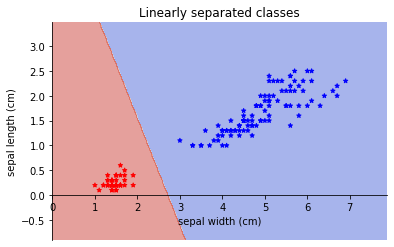

<Figure size 576x432 with 0 Axes>

In [84]:
fig, ax = plt.subplots() #provides a way to plot multiple plots

plt.figure(figsize=(8, 6))

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = Meshgrid_Crt(X0, X1)
Contours_Plot(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5, linestyles = ['--', '-', '--'])
ax.scatter(X0, X1, c=['blue' if c == 0 else 'red' for c in y], cmap=plt.cm.coolwarm, s=20, marker = '*')
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# title for the plots
ax.set_title('Linearly separated classes')
plt.show()